In [16]:
from pymongo import MongoClient
import pandas as pd
import base64
from IPython.display import Image, display

client = MongoClient('mongodb://localhost:27017/')
db = client['laptop_database']
collection = db['products']
data = collection.find()
document = collection.find_one({})


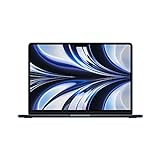

In [17]:
#Truy xuất ảnh từ mongodb
image_data = document['Image']
encoded_image = base64.b64encode(image_data).decode('utf-8')
display(Image(url=f"data:image/jpeg;base64,{encoded_image}"))

In [9]:
df = pd.DataFrame(list(data))
df

,_id,Processor (CPU),Memory (RAM),Screen size,Screen resolution,Weight,Size (length x width x height),Operating system (OS),Release date,Amazon.com Lowest New Price,Name
0,658635ddf646923317b46b6f,Intel Core M-5Y31,8gb,12″See more 12″ laptops,Full HD(1920 x 1080 pixels),2.03 lbs(0.92 kg),11.04 x 7.74 x 0.5 inches,None,None,None,Apple MacBook Retina 12″ (NB-AP-MACBOOK12MK4M2...
1,658635def646923317b46b70,Apple M1 Pro 10 Core 3200 MHz,32gb,14″See more 14″ laptops,None,6.9 lbs(3.13 kg),16 x 12 x 3.25 inches,None,None,None,Apple MacBook Pro 14″
2,658635dff646923317b46b71,Apple M3 Max 16 Core,64gb,14″See more 14″ laptops,None,5 lbs(2.27 kg),12.31 x 8.71 x 0.61 inches,None,None,None,Apple MacBook Z1AU002AE 14″
3,658635e0f646923317b46b72,None,8gb,14.2″See more 14.2″ laptops,Full HD(1920 x 1080 pixels),3.4 lbs(1.54 kg),12.31 x 8.71 x 0.61 inches,None,None,None,Apple MacBook MR7K3LL/A 14″
4,658635e1f646923317b46b73,Intel Core i5 Series,4gb,13.3″See more 13.3″ laptops,WXGA(1280 x 800 pixels),4.5 lbs(2.04 kg),None,macOS,"November 15, 2022",$400.04,Apple MacBook Pro 13” (Mid 2012) (MD101LL/A)
...,...,...,...,...,...,...,...,...,...,...,...
181,6586366bf646923317b46c24,Apple M1 8 Core 3200 MHz,8gb,13″See more 13″ laptops,None,None,None,macOS,"November 24, 2021",$819.98,Apple MacBook Air M1 13″
182,6586366cf646923317b46c25,Apple M3 Pro 11 Core,36gb,14″See more 14″ laptops,None,5 lbs(2.27 kg),12.31 x 8.71 x 0.61 inches,None,None,None,Apple MacBook Z1AU0029P 14″
183,6586366df646923317b46c26,None,8gb,13.3″See more 13.3″ laptops,None,3.57 lbs(1.62 kg),12.36 x 8.62 x 0.75 inches,None,None,None,Apple MacBook Pro ME662LL/A 13″ (MBPRO-ME662-S...
184,6586366ef646923317b46c27,Intel Core i5-4278U,8gb,13.3″See more 13.3″ laptops,WQXGA(2560 x 1600 pixels),3.46 lbs(1.57 kg),12.75 x 9.09 x 2.4 inches,None,None,None,Apple MacBook Pro 13” (Mid 2014) (MGX72LLA)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186 entries, 0 to 185
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             186 non-null    object
 1   Processor (CPU)                 161 non-null    object
 2   Memory (RAM)                    167 non-null    object
 3   Screen size                     184 non-null    object
 4   Screen resolution               71 non-null     object
 5   Weight                          156 non-null    object
 6   Size (length x width x height)  137 non-null    object
 7   Operating system (OS)           49 non-null     object
 8   Release date                    49 non-null     object
 9   Amazon.com Lowest New Price     49 non-null     object
 10  Name                            186 non-null    object
dtypes: object(11)
memory usage: 16.1+ KB


In [9]:
import pandas as pd

# Đọc file CSV
df = pd.read_csv('../laptop_data.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18254 entries, 0 to 18253
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   _id                             18254 non-null  object
 1   Processor (CPU)                 18067 non-null  object
 2   Memory (RAM)                    17888 non-null  object
 3   Screen size                     18253 non-null  object
 4   Screen resolution               17407 non-null  object
 5   Weight                          17253 non-null  object
 6   Hard drives                     17911 non-null  object
 7   Size (length x width x height)  16398 non-null  object
 8   Operating system (OS)           17108 non-null  object
 9   Release date                    18254 non-null  object
 10  Amazon.com Lowest New Price     18155 non-null  object
 11  Name                            18254 non-null  object
dtypes: object(12)
memory usage: 1.7+ MB
